In [31]:
import nltk
import matplotlib.pyplot as plt
import numpy
from nltk.corpus import twitter_samples
import random
import numpy as np
import math as m

nltk.download('twitter_samples')
nltk.download('stopwords')

[nltk_data] Error loading twitter_samples: <urlopen error [Errno 8]
[nltk_data]     nodename nor servname provided, or not known>
[nltk_data] Error loading stopwords: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>


False

In [4]:
# use predefined function ‘fileids()’ to see the content
twitter_samples.fileids()
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [5]:

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings
import re
import string                              # for string operations

stop_words = stopwords.words('english')
punctuation = string.punctuation
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)

tweets = all_positive_tweets + all_negative_tweets ## Concatenate the lists. 
labels = np.append(np.ones((len(all_positive_tweets),1)), np.zeros((len(all_negative_tweets),1)), axis = 0)

train_pos  = all_positive_tweets[:4000]
train_neg  = all_negative_tweets[:4000]
train_x = train_pos + train_neg 
train_y = np.append(np.ones(len(train_pos)), np.zeros(len(train_neg)), axis=0).reshape(-1)


test_pos  = all_positive_tweets[1000:]
test_neg  = all_negative_tweets[1000:]
test_x = test_pos + test_neg
test_y = np.append(np.ones(len(test_pos)),np.zeros(len(test_neg)), axis=0)



In [6]:
def preprocess(tweet) :
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    tweet = re.sub(r'https?://[^\s\n\r]+', '', tweet)
    tweet = re.sub(r'#', '', tweet)
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    stemmer = PorterStemmer()
    tweet_tokens = tokenizer.tokenize(tweet)
    cleaned_stemmed_tweet = []
    for token in tweet_tokens:
        if token not in stop_words and token not in punctuation :
            cleaned_stemmed_tweet.append(stemmer.stem(token))
    return cleaned_stemmed_tweet



In [7]:


def buildCooccurenceMatrix(corpus, word, k):
    Matrix = {}

    for text in corpus:
        text_split = text.split(" ")
        for i in range(len(text_split)) :
            if text_split[i]!= word :
                if text_split[i] not in Matrix:
                    Matrix[text_split[i]] = 0
                j = i+1
                while j<=i+k and j<len(text_split):
                    if text_split[j] == word:
                        Matrix[text_split[i]]+=1
                        #print(f'{text_split[i]} loop 1 {Matrix[text_split[i]]}')
                    j+=1

            else :
                j = i+1
                while j<=i+k and j<len(text_split):
                    if text_split[j] not in Matrix:
                        Matrix[text_split[j]] = 1
                        print(text_split[j])
                    else:
                        Matrix[text_split[j]] += 1
                        print(text_split[j])

                    j+=1
    return Matrix


            



In [8]:
corpus = ['I like simple data', 'I prefer simple raw data']
print(buildCooccurenceMatrix(corpus,"data", 3))

{'I': 1, 'like': 1, 'simple': 2, 'prefer': 1, 'raw': 1}


In [9]:
def EuclideanDistance(v1,v2) :
    return np.linalg.norm(v1-v2)

In [10]:
def cosineSimilarity(v1, v2):
    return (v1@v2)/(np.linalg.norm(v1)*np.linalg.norm(v2))

In [11]:
import pandas as pd # Library for Dataframes 
import numpy as np # Library for math functions
import pickle # Python object serialization library. Not secure

word_embeddings = pickle.load( open( "word_embeddings_subset.p", "rb" ) )
len(word_embeddings) # there should be 243 words that will be used in this assignment

243

In [12]:
def vectorize(word, word_embeddings=word_embeddings):
    return word_embeddings[word]

[[-0.13964844  0.06225586 -0.27929688 ...  0.20410156  0.23535156
  -0.05102539]
 [-0.16113281  0.10546875 -0.13867188 ...  0.25585938  0.20214844
  -0.01928711]
 [-0.0005188   0.16015625  0.0016098  ... -0.03540039  0.08886719
  -0.30273438]
 ...
 [ 0.02978516  0.25585938  0.23925781 ... -0.06030273  0.19726562
  -0.2734375 ]
 [-0.11865234  0.19921875 -0.22265625 ...  0.09960938  0.20605469
  -0.09912109]
 [ 0.18066406 -0.0090332   0.12988281 ... -0.33984375  0.2734375
   0.04492188]]


<Axes: >

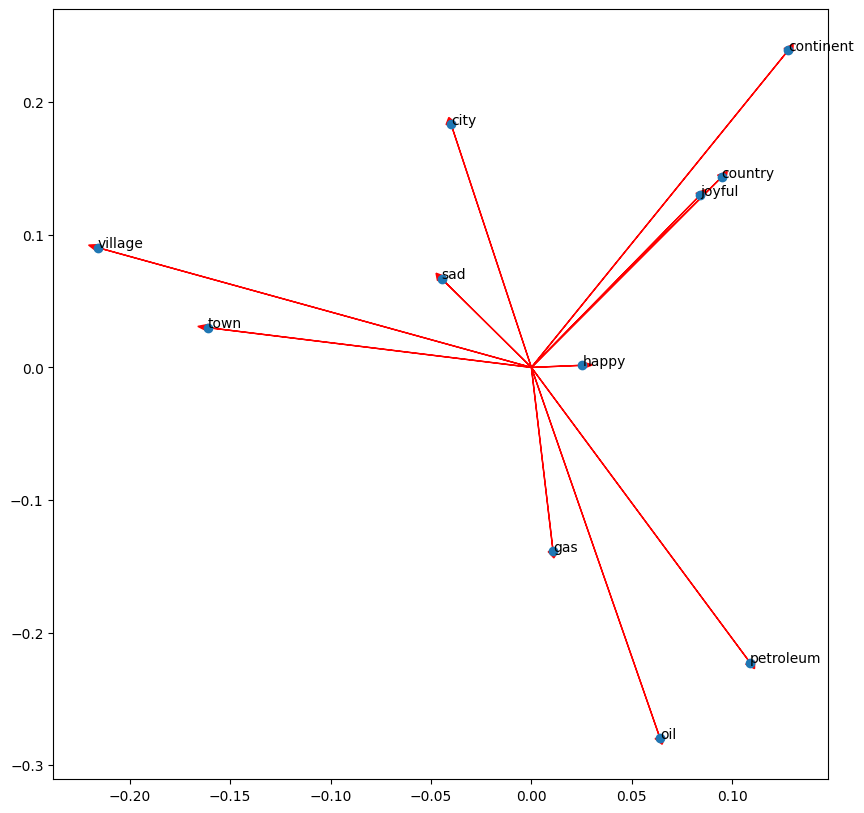

In [13]:
import matplotlib.pyplot as plt
words = ['oil', 'gas', 'happy', 'sad', 'city', 'town', 'village', 'country', 'continent', 'petroleum', 'joyful']
def plot_vectors(words, col1, col2):
    fig,ax = plt.subplots(figsize = (10, 10))
    bag2d = np.array([vectorize(word) for word in words])
    print(bag2d)
    for vector in bag2d:
        xval = vector[col1]
        yval = vector[col2]
        ax.arrow(0, 0, xval, yval, head_width=0.005, head_length=0.005, fc='r', ec='r', width = 1e-5)
    ax.scatter(bag2d[:, col1], bag2d[:, col2])

    for i in range(0, len(words)):
        ax.annotate(words[i], (bag2d[i, col1], bag2d[i, col2]))
    return ax

plot_vectors(words, 3, 2)

In [14]:
def kmostsimilar(word, k, words, word_embeddings=word_embeddings) :
    cosineDistances = []
    for w in words:
        if w != word :
            cosineDistances.append((w, cosineSimilarity(word_embeddings[word], word_embeddings[w])))
    cosineDistances.sort(key = lambda x: x[1], reverse=True)
    return cosineDistances[:2]



In [15]:
print(kmostsimilar('oil',2,words))

[('petroleum', 0.76550657), ('gas', 0.7105981)]


In [16]:
def plotDistance(word1, word2, ax):
    col1 = 3
    col2 = 2
    bag2d = np.array([vectorize(word1), vectorize(word2)])
    for vector in bag2d:
        xval = vector[col1]
        yval = vector[col2]
        ax.arrow(0, 0, xval, yval, head_width=0.005, head_length=0.005, fc='r', ec='r', width = 1e-5)
    dx = bag2d[1][col1] - bag2d[0][col1]
    dy = bag2d[1][col2] - bag2d[0][col2]
    ax.arrow(bag2d[0][col1], bag2d[0][col2], dx, dy, head_width=0.005, head_length=0.005, fc='b', ec='b', width = 1e-5)
    



[[-0.13964844  0.06225586 -0.27929688 ...  0.20410156  0.23535156
  -0.05102539]
 [-0.16113281  0.10546875 -0.13867188 ...  0.25585938  0.20214844
  -0.01928711]
 [-0.0005188   0.16015625  0.0016098  ... -0.03540039  0.08886719
  -0.30273438]
 ...
 [ 0.02978516  0.25585938  0.23925781 ... -0.06030273  0.19726562
  -0.2734375 ]
 [-0.11865234  0.19921875 -0.22265625 ...  0.09960938  0.20605469
  -0.09912109]
 [ 0.18066406 -0.0090332   0.12988281 ... -0.33984375  0.2734375
   0.04492188]]


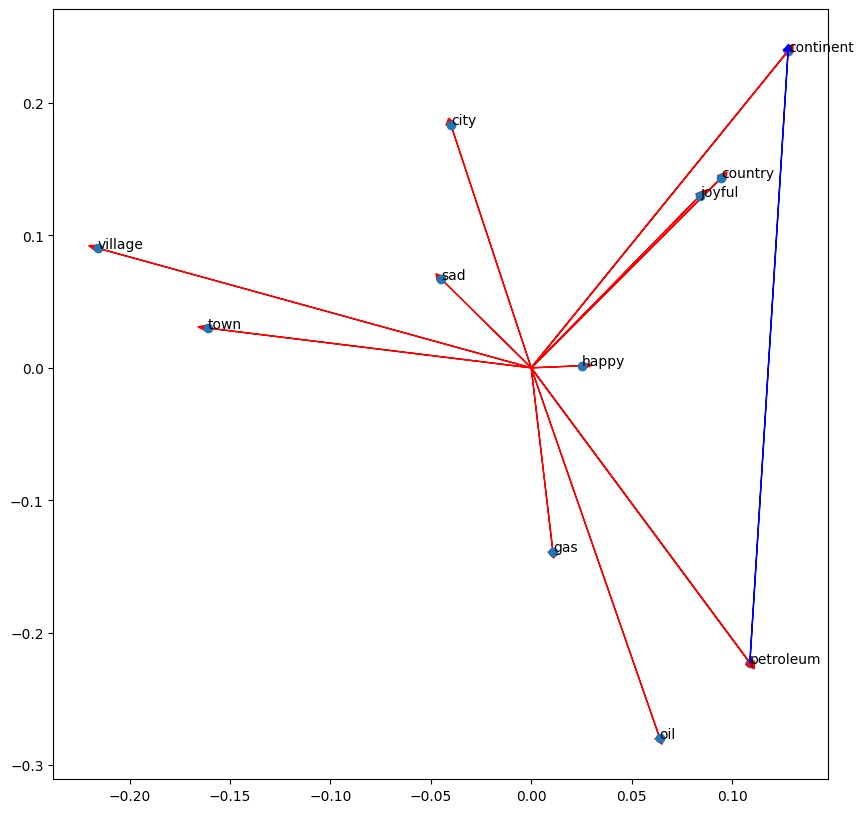

In [17]:
plotDistance('petroleum', 'continent', plot_vectors(words, 3, 2))

In [18]:

def cov(words, iswords, num_pcs=2) :
    if iswords:
        word_matrix = np.array([vectorize(word) for word in words])
    else:
        word_matrix = words
    word_matrix_demean = word_matrix - np.mean(word_matrix, axis=0)

    #print(np.shape(word_matrix)[0])
    cov_matrix = 1/np.shape(word_matrix)[0] * np.matmul(word_matrix_demean.T, word_matrix_demean)
    #eigenvalues = np.linalg.eigvals(cov_matrix)
    eigenvalues,eigenvectors = np.linalg.eig(cov_matrix)
    # Sort the eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    #print(eigenvectors)
    #print(eigenvalues)

    return np.dot(word_matrix_demean, eigenvectors[:, :num_pcs])
        

[[ 2.0740309  -0.22656526]
 [ 1.8441234  -0.03856923]
 [-1.0197306  -1.2688811 ]
 [-1.1757878  -1.7607645 ]
 [-0.60177946  1.0932409 ]
 [-0.85581124  1.2961617 ]
 [-0.99052584  1.6122221 ]
 [-0.3180205   0.4153339 ]
 [-0.21069342  0.57592535]
 [ 2.3135853  -0.2978353 ]
 [-1.0593901  -1.400269  ]]


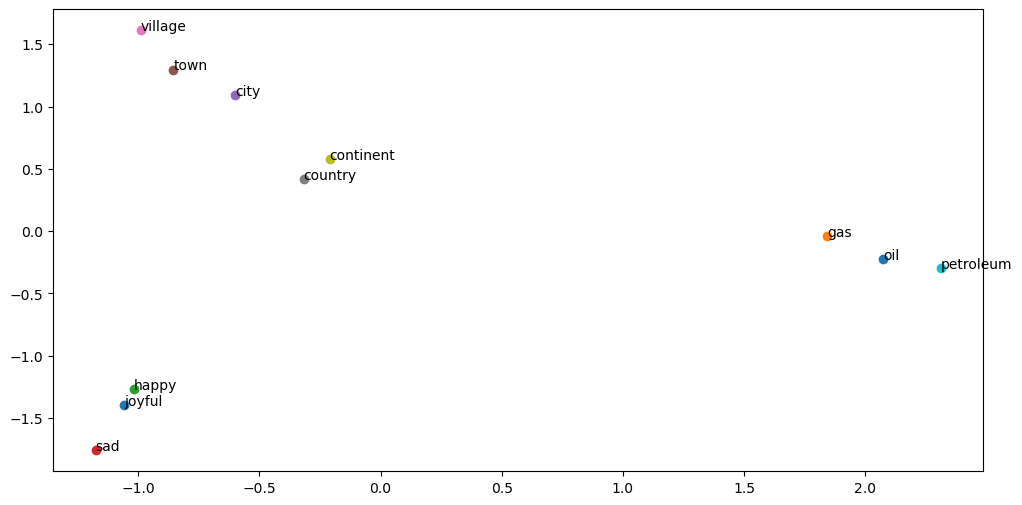

In [19]:
test_array =  np.array([[2.0,3.0],[3.0,4.0],[5.0,6.0],[8.0,9.0]])
words_array = ['oil', 'gas', 'happy', 'sad', 'city', 'town', 'village', 'country', 'continent', 'petroleum', 'joyful']
word_matrix = np.array([vectorize(word) for word in words_array])

plt.figure(figsize=(12, 6))
p = cov(words_array, True)
print(p)
for i,word in zip(p,words_array):
    (x, y) = i
    plt.scatter(x, y)
    plt.text(x=x, y=y, s=word)
plt.show()

/var/folders/sy/2jzm18gs78s48trcqgthb1xh0000gn/T/ipykernel_34267/145342088.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['variety'] = df['variety'].replace('Virginica', 2.0)


[[-2.68412563 -0.31939725]
 [-2.71414169  0.17700123]
 [-2.88899057  0.14494943]
 [-2.74534286  0.31829898]
 [-2.72871654 -0.32675451]
 [-2.28085963 -0.74133045]
 [-2.82053775  0.08946138]
 [-2.62614497 -0.16338496]
 [-2.88638273  0.57831175]
 [-2.6727558   0.11377425]
 [-2.50694709 -0.6450689 ]
 [-2.61275523 -0.01472994]
 [-2.78610927  0.235112  ]
 [-3.22380374  0.51139459]
 [-2.64475039 -1.17876464]
 [-2.38603903 -1.33806233]
 [-2.62352788 -0.81067951]
 [-2.64829671 -0.31184914]
 [-2.19982032 -0.87283904]
 [-2.5879864  -0.51356031]
 [-2.31025622 -0.39134594]
 [-2.54370523 -0.43299606]
 [-3.21593942 -0.13346807]
 [-2.30273318 -0.09870885]
 [-2.35575405  0.03728186]
 [-2.50666891  0.14601688]
 [-2.46882007 -0.13095149]
 [-2.56231991 -0.36771886]
 [-2.63953472 -0.31203998]
 [-2.63198939  0.19696122]
 [-2.58739848  0.20431849]
 [-2.4099325  -0.41092426]
 [-2.64886233 -0.81336382]
 [-2.59873675 -1.09314576]
 [-2.63692688  0.12132235]
 [-2.86624165 -0.06936447]
 [-2.62523805 -0.59937002]
 

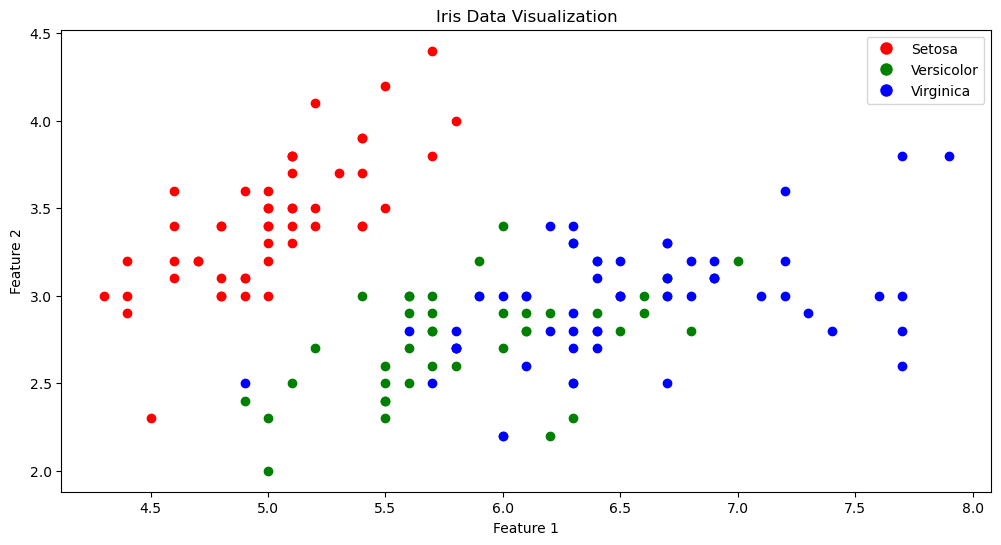

In [29]:
import matplotlib

df = pd.read_csv("DataSets/iris.csv")

df['variety'] = df['variety'].replace('Setosa', 0.0)
df['variety'] = df['variety'].replace('Versicolor', 1.0)
df['variety'] = df['variety'].replace('Virginica', 2.0)

features = df.drop('variety', axis=1).to_numpy()
labels = df['variety'].to_numpy()
    

colors = ['red','green','blue']
plt.figure(figsize=(12, 6))
points = cov(features, False)
print(points)
for feature, label in zip(features, labels):
    plt.scatter(feature[0], feature[1], c=colors[int(label)], label=int(label))

# Adding legend
legend_labels = {0.0: 'Setosa', 1.0: 'Versicolor', 2.0: 'Virginica'}
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors]
plt.legend(handles, [legend_labels[label] for label in legend_labels.keys()])

# Show the plot
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Iris Data Visualization')
plt.show()